In [1]:
## Bike Sharing Case Study

In [2]:
### Importing and Understanding Data

In [326]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
# Importing day.csv
bike_sharing_data = pd.read_csv('day.csv')

In [330]:
# Looking at the first five rows
bike_sharing_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [331]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [332]:
# Converting season to categorical string values : 1:spring, 2:summer, 3:fall, 4:winter

# Defining the map function
def season_map(x):
    match x:
        case 1:
            return "spring"
        case 2:
            return "summer"
        case 3:
            return "fall"
        case default:
            return "winter"

# Applying the function to the housing list
bike_sharing_data['season'] = bike_sharing_data['season'].apply(lambda x : season_map(x))


In [333]:
bike_sharing_data['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [334]:
bike_sharing_data['season'] = bike_sharing_data['season'].astype('category')

In [ ]:
# Converting weathersit to categorical string values 

# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 	4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [335]:
# Defining the map function
def weather_map(x):
    match x:
        case 1:
            return "ClearOrPartlyCloudy"
        case 2:
            return "MistAndCloudy"
        case 3:
            return "LightSnowAndRain"
        case default:
            return "HeavyRainAndThunder"

# Applying the function to the housing list
bike_sharing_data['weathersit'] = bike_sharing_data['weathersit'].apply(lambda x : weather_map(x))

In [336]:
bike_sharing_data['weathersit'].value_counts()

ClearOrPartlyCloudy    463
MistAndCloudy          246
LightSnowAndRain        21
Name: weathersit, dtype: int64

In [337]:
bike_sharing_data['weathersit'] = bike_sharing_data['weathersit'].astype('category')

In [10]:
### Dummy Variables

In [338]:
# for season column 
seasons = pd.get_dummies(bike_sharing_data['season'], )

# Check what the dataset 'seasons' looks like
seasons.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [339]:
# Let's drop the first column from seasons df using 'drop_first = True'
seasons = pd.get_dummies(bike_sharing_data['season'], drop_first = True)


In [340]:
# Check what the dataset 'seasons' looks like
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [341]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,MistAndCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,MistAndCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,ClearOrPartlyCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,ClearOrPartlyCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,ClearOrPartlyCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [342]:
# for weathersit column 

weathers = pd.get_dummies(bike_sharing_data['weathersit'], )

# Check what the dataset 'weathers' looks like
weathers.head()

## There is no HeavyRainAndThunder in the data so, either any of the three present. We can drop first ClearOrPartlyCloudy
## and still can find this value i,e 00 means weathersit is ClearOrPartlyCloudy


,ClearOrPartlyCloudy,LightSnowAndRain,MistAndCloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [343]:
# Let's drop the first column from weathers df using 'drop_first = True'
weathers = pd.get_dummies(bike_sharing_data['weathersit'], drop_first = True)

In [344]:
# Check what the dataset 'weathers' looks like
weathers.head()

,LightSnowAndRain,MistAndCloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [345]:
bike_sharing_data['dteday'] = bike_sharing_data['dteday'].astype('datetime64[ns]')

##bike_sharing_data['month']

In [346]:
bike_sharing_data['mnth'] =  bike_sharing_data['dteday'].dt.month_name()

In [348]:
bike_sharing_data['weekday'] =  bike_sharing_data['dteday'].dt.day_name()

In [349]:
bike_sharing_data['mnth']

0       January
1      February
2         March
3         April
4           May
         ...   
725    December
726    December
727    December
728    December
729    December
Name: mnth, Length: 730, dtype: object

In [350]:
bike_sharing_data['weekday']

0        Monday
1      Thursday
2      Thursday
3        Sunday
4       Tuesday
         ...   
725      Friday
726    Saturday
727      Sunday
728      Monday
729     Tuesday
Name: weekday, Length: 730, dtype: object

In [351]:
# Let's drop the first column from months df using 'drop_first = True'
months = pd.get_dummies(bike_sharing_data['mnth'], drop_first = True)

In [49]:
months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   August     730 non-null    uint8
 1   December   730 non-null    uint8
 2   February   730 non-null    uint8
 3   January    730 non-null    uint8
 4   July       730 non-null    uint8
 5   June       730 non-null    uint8
 6   March      730 non-null    uint8
 7   May        730 non-null    uint8
 8   November   730 non-null    uint8
 9   October    730 non-null    uint8
 10  September  730 non-null    uint8
dtypes: uint8(11)
memory usage: 8.0 KB


In [352]:
# Let's drop the first column from days df using 'drop_first = True'
days = pd.get_dummies(bike_sharing_data['weekday'], drop_first = True)

In [353]:
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Monday     730 non-null    uint8
 1   Saturday   730 non-null    uint8
 2   Sunday     730 non-null    uint8
 3   Thursday   730 non-null    uint8
 4   Tuesday    730 non-null    uint8
 5   Wednesday  730 non-null    uint8
dtypes: uint8(6)
memory usage: 4.4 KB


In [354]:
# Add the weathers ,seasons, months df to the original bike_sharing_data dataframe
bike_sharing_data = pd.concat([bike_sharing_data, seasons, weathers, months, days], axis = 1)

# Now let's see the head of our dataframe.
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,2018-01-01,spring,0,January,0,Monday,0,MistAndCloudy,14.110847,...,0,0,0,0,1,0,0,0,0,0
1,2,2018-02-01,spring,0,February,0,Thursday,0,MistAndCloudy,14.902598,...,0,0,0,0,0,0,0,1,0,0
2,3,2018-03-01,spring,0,March,0,Thursday,1,ClearOrPartlyCloudy,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,spring,0,April,0,Sunday,1,ClearOrPartlyCloudy,8.200000,...,0,0,0,0,0,0,1,0,0,0
4,5,2018-05-01,spring,0,May,0,Tuesday,1,ClearOrPartlyCloudy,9.305237,...,1,0,0,0,0,0,0,0,1,0


In [355]:
# Drop 'season' and 'weathersit' , 'mnth' and 'weekday' as we have created the dummies for it
bike_sharing_data.drop(['season', 'weathersit', 'mnth', 'weekday'], axis = 1, inplace = True)

bike_sharing_data.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,1,0,0,0,0,0
1,2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,1,0,0
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,1,0,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,1,0,0,0,0,0,0,0,1,0


In [356]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           730 non-null    int64         
 1   dteday            730 non-null    datetime64[ns]
 2   yr                730 non-null    int64         
 3   holiday           730 non-null    int64         
 4   workingday        730 non-null    int64         
 5   temp              730 non-null    float64       
 6   atemp             730 non-null    float64       
 7   hum               730 non-null    float64       
 8   windspeed         730 non-null    float64       
 9   casual            730 non-null    int64         
 10  registered        730 non-null    int64         
 11  cnt               730 non-null    int64         
 12  spring            730 non-null    uint8         
 13  summer            730 non-null    uint8         
 14  winter            730 non-

In [357]:
# We can drop 'instant' column as this is just an index. Not be used as a predictors
# We can drop 'dteday' column as this can't be a predictors . Already year , month , weekday and workingday
# all these columns are already there

# we can drop casual and registered as any one out of casual or registered or cnt can be target var

bike_sharing_data.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)


In [422]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   spring            730 non-null    uint8  
 9   summer            730 non-null    uint8  
 10  winter            730 non-null    uint8  
 11  LightSnowAndRain  730 non-null    uint8  
 12  MistAndCloudy     730 non-null    uint8  
 13  August            730 non-null    uint8  
 14  December          730 non-null    uint8  
 15  February          730 non-null    uint8  
 16  January           730 non-null    uint8  
 1

In [424]:
sns.pairplot()

In [27]:
### Splitting the Data into Training and Testing Sets

In [466]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike_sharing_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
# Rescaling the Features
# using MinMax scaling.

In [467]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [468]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Dividing into X and Y sets for the model building¶

In [469]:
y_train = df_train.pop('cnt')
X_train = df_train

In [470]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [471]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [472]:
# define the method
rfe = RFE(estimator=lm, n_features_to_select=12)

In [473]:
rfe = rfe.fit(X_train, y_train)

In [474]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('LightSnowAndRain', True, 1),
 ('MistAndCloudy', True, 1),
 ('August', False, 9),
 ('December', False, 7),
 ('February', False, 8),
 ('January', False, 3),
 ('July', False, 2),
 ('June', False, 6),
 ('March', False, 14),
 ('May', False, 10),
 ('November', False, 4),
 ('October', False, 15),
 ('September', True, 1),
 ('Monday', False, 18),
 ('Saturday', False, 13),
 ('Sunday', False, 16),
 ('Thursday', False, 17),
 ('Tuesday', False, 11),
 ('Wednesday', False, 12)]

In [475]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'LightSnowAndRain', 'MistAndCloudy', 'September'],
      dtype='object')

In [476]:
X_train.columns[~rfe.support_]

Index(['workingday', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [ ]:
## Building model using statsmodel, for the detailed statistics

In [477]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [478]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [479]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [480]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.7
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          2.05e-184
Time:                        23:22:39   Log-Likelihood:                 495.05
No. Observations:                 510   AIC:                            -964.1
Df Residuals:                     497   BIC:                            -909.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2807      0.035  

In [481]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,73.05
3,temp,57.84
4,atemp,53.42
7,spring,4.66
9,winter,3.23
8,summer,2.18
5,hum,1.87
11,MistAndCloudy,1.57
10,LightSnowAndRain,1.25
6,windspeed,1.24


In [482]:
# We can drop LightSnowAndRain column as very high p value

X_train_rfe = X_train_rfe.drop(["atemp"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     226.0
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.35e-185
Time:                        23:22:57   Log-Likelihood:                 495.03
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     498   BIC:                            -915.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2805      0.035  

In [483]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,73.01
6,spring,4.60
3,temp,3.51
8,winter,3.12
7,summer,2.10
4,hum,1.87
10,MistAndCloudy,1.56
9,LightSnowAndRain,1.24
5,windspeed,1.19
11,September,1.05


In [484]:
## Let's drop const column

X_train_rfe = X_train_rfe.drop(["const"], axis = 1)

In [485]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.17
2,temp,14.79
4,windspeed,4.64
5,spring,3.73
7,winter,3.05
9,MistAndCloudy,2.28
6,summer,2.27
0,yr,2.07
8,LightSnowAndRain,1.24
10,September,1.13


In [486]:
## Let's drop hum column

X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1604.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):                        0.00
Time:                        23:23:51   Log-Likelihood:                          463.90
No. Observations:                 510   AIC:                                     -907.8
Df Residuals:                     500   BIC:                                     -865.5
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [453]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.67
0,yr,2.07
4,spring,1.96
5,summer,1.80
6,winter,1.62
8,MistAndCloudy,1.54
9,September,1.12
7,LightSnowAndRain,1.08
1,holiday,1.04


In [487]:
## Let's drop hum column

X_train_rfe = X_train_rfe.drop(["windspeed"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1733.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):                        0.00
Time:                        23:24:36   Log-Likelihood:                          456.44
No. Observations:                 510   AIC:                                     -894.9
Df Residuals:                     501   BIC:                                     -856.8
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [488]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.71
0,yr,2.06
4,summer,1.54
7,MistAndCloudy,1.54
5,winter,1.42
3,spring,1.29
8,September,1.12
6,LightSnowAndRain,1.06
1,holiday,1.04


In [489]:
## Let's drop hum column

X_train_rfe = X_train_rfe.drop(["spring"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1941.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):                        0.00
Time:                        23:26:21   Log-Likelihood:                          454.77
No. Observations:                 510   AIC:                                     -893.5
Df Residuals:                     502   BIC:                                     -859.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [490]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.70
0,yr,1.94
3,summer,1.45
6,MistAndCloudy,1.44
4,winter,1.34
7,September,1.12
5,LightSnowAndRain,1.06
1,holiday,1.03


In [ ]:
## Residual Analysis

In [491]:
X_train_rfe

,yr,holiday,temp,summer,winter,LightSnowAndRain,MistAndCloudy,September
653,1,0,0.509887,0,1,0,0,0
576,1,0,0.815169,0,0,0,0,0
426,1,0,0.442393,0,0,0,1,0
728,1,0,0.245101,0,0,0,0,0
482,1,0,0.395666,1,0,0,1,0
...,...,...,...,...,...,...,...,...
526,1,0,0.824514,1,0,0,1,0
578,1,0,0.863973,0,0,0,0,0
53,0,0,0.202618,0,0,0,0,0
350,0,0,0.248216,0,1,0,1,0


In [492]:
y_train_pred = lm.predict(X_train_rfe)

In [493]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

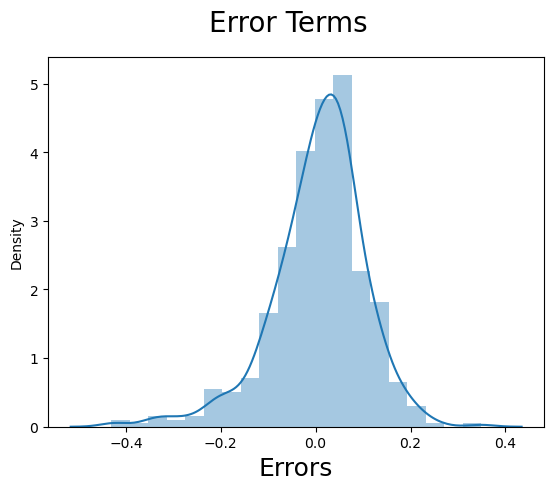

In [494]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [495]:
num_vars = ['temp', 'atemp', 'hum','windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

y_test = df_test.pop('cnt')
X_test = df_test

In [496]:
X_test_new = X_test[X_train_rfe.columns]

In [497]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_test_pred')

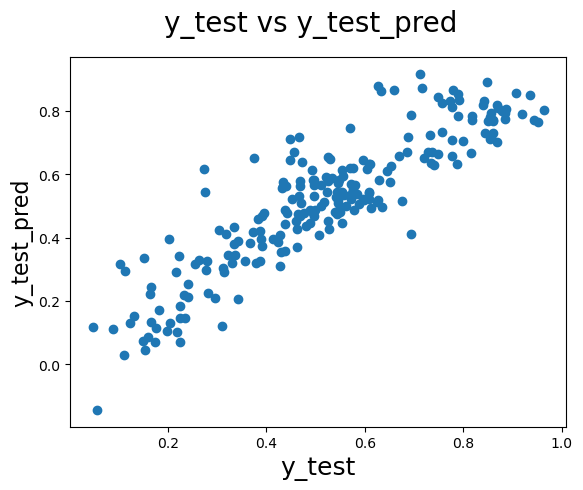

In [498]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)   

In [499]:
from sklearn.metrics import r2_score

In [500]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7866554884934083